Use tf.image to apply real-time data augmentation techniques like flipping, rotating, and adjusting contrast to improve generalization in image classification.

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Load and preprocess a simple image
image_path=tf.keras.utils.get_file(
    'cat.jpg',
    "https://tensorflow.org/images/blogs/serving/cat.jpg"
)

img_raw=tf.io.read_file(image_path)
img=tf.image.decode_jpeg(img_raw,channels=3)
img=tf.image.resize(img,[224,224])
img=tf.cast(img,tf.float32)/255.0

In [14]:
#Define a list of augmentations using tf.image
augmented_images =[
    img,
    tf.image.flip_left_right(img),
    tf.image.flip_up_down(img),
    tf.image.rot90(img),
    tf.image.adjust_brightness(img,0.3),
    tf.image.adjust_contrast(img,2.0),
    tf.image.random_crop(tf.image.resize(img,[256,256]),[224,224,3])
]

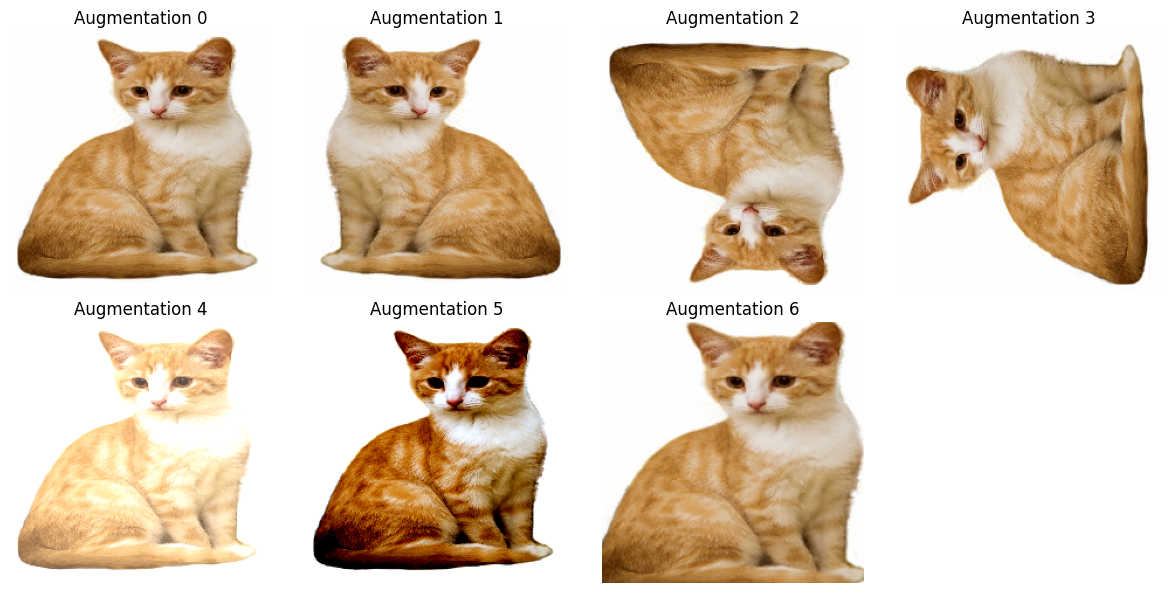

In [15]:
plt.figure(figsize=(12, 6))
for i, augmented in enumerate(augmented_images):
    plt.subplot(2, 4, i + 1)
    plt.imshow(tf.clip_by_value(augmented, 0.0, 1.0))
    plt.axis('off')
    plt.title(f"Augmentation {i}")
plt.tight_layout()
plt.show()
